In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [13]:
df = pd.read_csv('Students.csv')
x = df['Attendance'].values.reshape(-1, 1)
y = df['TestScore'].values.reshape(-1, 1)

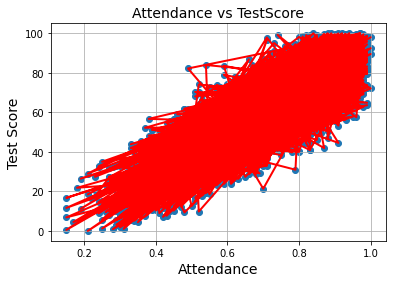

In [14]:
    plt.scatter(x, y)
    plt.plot(x, y, color='red', linewidth=2)
    plt.title('Attendance vs TestScore', fontsize = 14)
    plt.xlabel('Attendance', fontsize = 14)
    plt.ylabel('Test Score', fontsize = 14)
    plt.grid(True)
    plt.show()